<a href="https://colab.research.google.com/github/VIVEKPATIL12/DS_Combined/blob/main/1000_RSCD_sub_classi_3_cate_57_Accuracy_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import zipfile

In [3]:
zip_ref = zipfile.ZipFile('/content/RSCD_1000.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

classes = [
    "water_asphalt_severe",
    "water_concrete_severe",
    "water_gravel",
    "water_mud",
    "wet_asphalt_severe",
    "wet_concrete_severe",
    "wet_gravel",
    "wet_mud",
    "dry_asphalt_severe",
    "dry_concrete_severe",
    "dry_gravel",
    "dry_mud",
    "fresh_snow",
    "ice",
    "melted_snow"
] # replace with your actual class names
data_dir = '/content/RSCD_1000'
train_dir = '/content/train/'
test_dir = '/content/test/'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    # Create class-specific train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Get a list of all image files for this class
    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # 80% train, 20% test

    # Copy the train files into the train directory
    for file in train_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))

    # Copy the test files into the test directory
    for file in test_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))




In [5]:
# Train the Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import scipy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')




Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [6]:
# Load the VGG16 network, ensuring the head FC layer sets are left off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(15, activation="softmax")(headModel)  # Change the number here according to your number of classes

# Place the head FC model on top of the base model (this will become the actual model we will train)
model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# # Train the model
# model.fit(train_generator, validation_data=test_generator, epochs=2)

# # Save the model
# model.save('model.h5')




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

model.fit(train_generator, validation_data=test_generator, epochs=100, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 255ms/step - accuracy: 0.3177 - loss: 2.0925 - val_accuracy: 0.4673 - val_loss: 1.5899
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 103s 185ms/step - accuracy: 0.5296 - loss: 1.4170 - val_accuracy: 0.5383 - val_loss: 1.4200
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 200ms/step - accuracy: 0.6065 - loss: 1.2013 - val_accuracy: 0.5310 - val_loss: 1.3721
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 66s 175ms/step - accuracy: 0.6644 - loss: 1.0357 - val_accuracy: 0.5293 - val_loss: 1.3516
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.6932 - loss: 0.9450 - val_accuracy: 0.5590 - val_loss: 1.2721
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 210ms/step - accuracy: 0.7352 - loss: 0.8429 - val_accuracy: 0.5847 - val_loss: 1.2202
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 166ms/step - accuracy: 0.7638 - loss: 0.7520 - val_accuracy: 0.5817 - val_loss: 1.2221
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.7920 - loss: 0.6

Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step


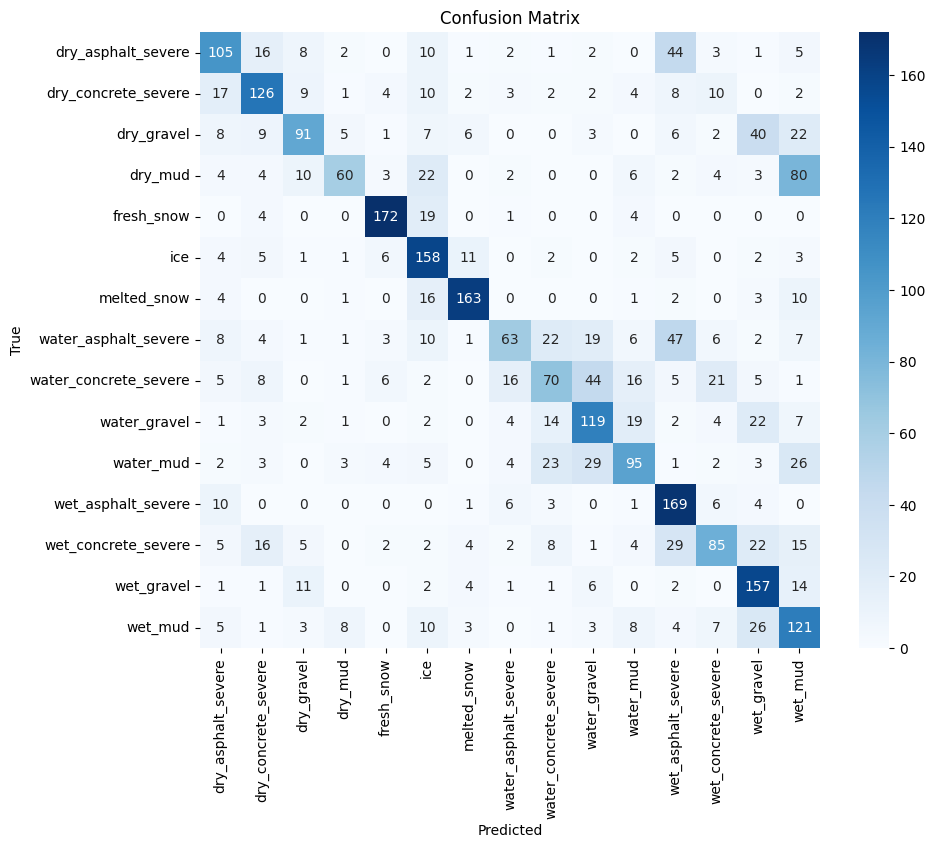

In [8]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


                       precision    recall  f1-score   support

   dry_asphalt_severe       0.59      0.53      0.55       200
  dry_concrete_severe       0.63      0.63      0.63       200
           dry_gravel       0.65      0.46      0.53       200
              dry_mud       0.71      0.30      0.42       200
           fresh_snow       0.86      0.86      0.86       200
                  ice       0.57      0.79      0.67       200
          melted_snow       0.83      0.81      0.82       200
 water_asphalt_severe       0.61      0.32      0.41       200
water_concrete_severe       0.48      0.35      0.40       200
         water_gravel       0.52      0.59      0.56       200
            water_mud       0.57      0.47      0.52       200
   wet_asphalt_severe       0.52      0.84      0.64       200
  wet_concrete_severe       0.57      0.42      0.49       200
           wet_gravel       0.54      0.79      0.64       200
              wet_mud       0.39      0.60      0.47  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step


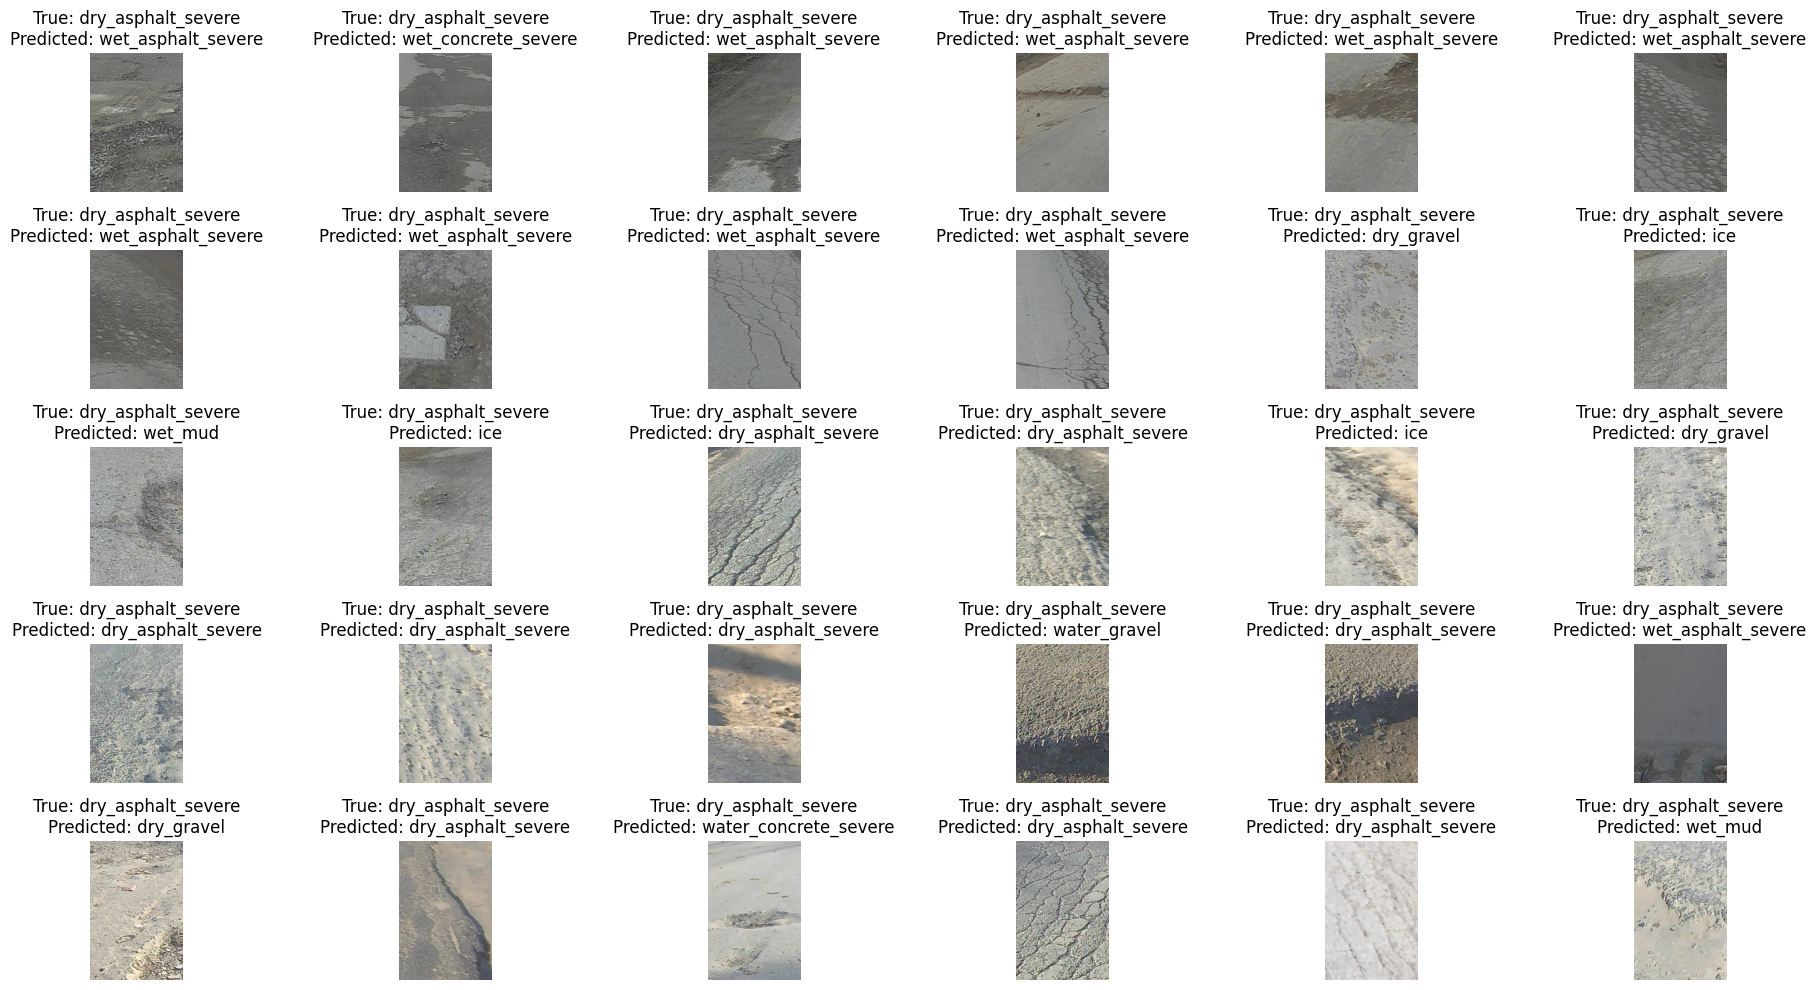

Streaming output truncated to the last 5000 lines.
wet_gravel : 0.39750862
wet_mud : 0.06727575

True Class: wet_gravel
Predicted Class: wet_mud
Predicted Probabilities:
dry_asphalt_severe : 0.012317981
dry_concrete_severe : 0.00278939
dry_gravel : 0.2466155
dry_mud : 0.023813855
fresh_snow : 0.0001246982
ice : 0.14945392
melted_snow : 0.060025305
water_asphalt_severe : 0.002396233
water_concrete_severe : 0.0011793292
water_gravel : 0.0064750286
water_mud : 0.004362017
wet_asphalt_severe : 0.01222412
wet_concrete_severe : 0.02164456
wet_gravel : 0.11401824
wet_mud : 0.3425599

True Class: wet_gravel
Predicted Class: dry_gravel
Predicted Probabilities:
dry_asphalt_severe : 0.07556162
dry_concrete_severe : 0.0039947857
dry_gravel : 0.38086936
dry_mud : 0.001183621
fresh_snow : 8.462588e-06
ice : 0.0013912548
melted_snow : 0.00029527125
water_asphalt_severe : 0.027557213
water_concrete_severe : 0.011715527
water_gravel : 0.039870188
water_mud : 0.00085778226
wet_asphalt_severe : 0.0284851

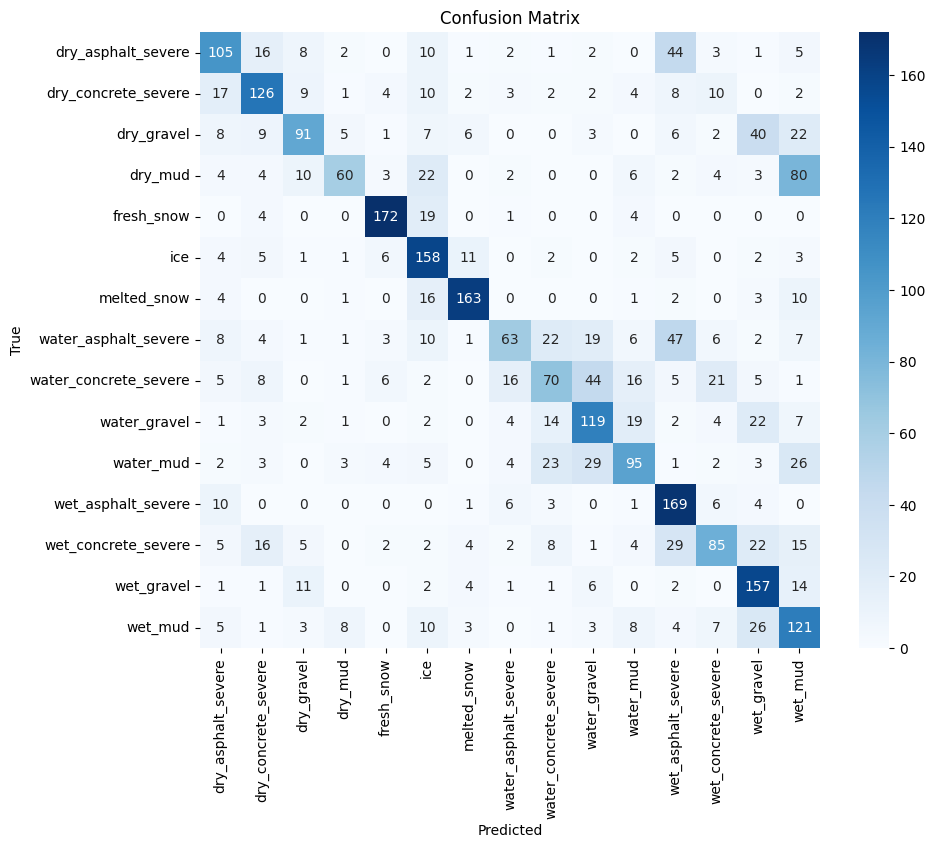

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.59      0.53      0.55       200
  dry_concrete_severe       0.63      0.63      0.63       200
           dry_gravel       0.65      0.46      0.53       200
              dry_mud       0.71      0.30      0.42       200
           fresh_snow       0.86      0.86      0.86       200
                  ice       0.57      0.79      0.67       200
          melted_snow       0.83      0.81      0.82       200
 water_asphalt_severe       0.61      0.32      0.41       200
water_concrete_severe       0.48      0.35      0.40       200
         water_gravel       0.52      0.59      0.56       200
            water_mud       0.57      0.47      0.52       200
   wet_asphalt_severe       0.52      0.84      0.64       200
  wet_concrete_severe       0.57      0.42      0.49       200
           wet_gravel       0.54      0.79      0.64       200
              wet_mud       0.39      0.60      0.47  

In [9]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the paths of the test images
test_paths = test_generator.filepaths

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Plot images and their predicted probabilities
fig, axs = plt.subplots(5, 6, figsize=(20, 10))
for i in range(min(30, len(true_classes))):
    ax = axs[i // 6, i % 6]
    img_path = test_paths[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"True: {class_labels[true_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))